### Conceptos básicos de la red convolucional

#### Definir utilidades de código

In [1]:
def check_torch():
    print(f"{Fore.LIGHTRED_EX}Pytorch version: {Fore.LIGHTMAGENTA_EX}{torch.__version__}{Fore.RESET}")
    if torch.backends.mps.is_available() and torch.backends.mps.is_built():
        print(f"{Fore.LIGHTMAGENTA_EX}The current {Fore.LIGHTRED_EX}Pytorch{Fore.LIGHTMAGENTA_EX} installation was built with MPS activated{Fore.RESET}")

In [2]:
def show_kernel_params(kernel, show=True):
    N, C, H, W = kernel.shape
    if show:
        print(f"{Fore.LIGHTRED_EX}samples: {Fore.RESET}{N}, {Fore.LIGHTMAGENTA_EX}channels: {Fore.RESET}{C}, {Fore.LIGHTBLUE_EX}height: {Fore.RESET}{H}, {Fore.LIGHTCYAN_EX}width: {Fore.RESET}{W}")
    return N, C, H, W

#### Parámetros para la capa convolucional _torch.nn.Conv2d_

* **in_channels:** En términos de imágenes, las características se denominan _canales_; son como los canales de color en una imagen:
     * Una imagen en escala de grises tiene 1 característica/canal
     * Una imagen en color tiene 3 características/canales
     
* **out_channels:** cuántos núcleos queremos usar. Análogo al número de nodos ocultos en una capa oculta de una red totalmente conectada.

* **kernel_size:** el tamaño del kernel. Los tamaños comunes son 3x3, 5x5, 7x7.

* **padding:** el número de píxeles que debemos rellenar en el exterior de la imagen para que podamos obtener píxeles de borde.

* **stride:** el "tamaño de paso" del kernel.

In [3]:
def apply_conv(image, kernel):
    # obtener parámetros del kernel
    N, C, H, W = show_kernel_params(kernel, show=False)
    # crear capa de convolución
    conv = torch.nn.Conv2d(1, 1, kernel_size=(H, W), padding=1)
    # acondicionar imagen de acuerdo a la canidad de canales
    img = image[None, None, :]
    # aplicar operación de convolución
    with torch.no_grad():
        conv.weight[:] = kernel        # asignar kernel a la capa convolucional 
        new_img = conv(img).squeeze()  # realizar la convolución
        return new_img                 # retorar imagen con el kernel aplicado

In [4]:
import torch
import cv2, h5py
import numpy as np
from torch import nn
from colorama import Fore
from torchvision import transforms
from matplotlib import pyplot as plt

check_torch()

Pytorch version: 1.13.0
The current Pytorch installation was built with MPS activated


In [5]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

In [6]:
src = plt.imread("sea.png")

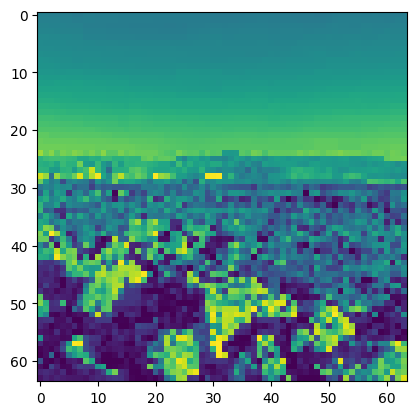

In [7]:
# Imagen tradicional de H ✕ W ✕ C
image = torch.from_numpy(src)
image = image/255
channel0 = image[:, :, 0]

plt.imshow(channel0)
plt.show()

In [8]:
# Tensor de C ✕ H ✕ W
image = transforms.ToTensor()(src)
channel0 = image[0]

In [9]:
kernel = torch.tensor([[[[ -2,  -1,  0],
                         [ -1,   1,  1],
                         [  0,   1,  2]]]])

N, C, H, W = show_kernel_params(kernel)

samples: 1, channels: 1, height: 3, width: 3


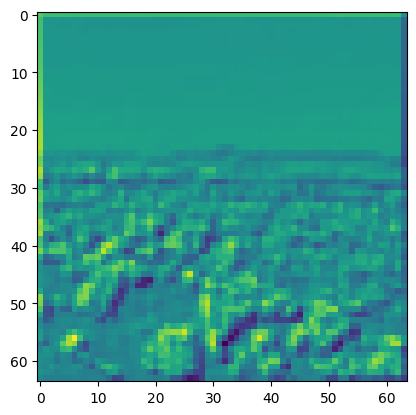

'image shape: torch.Size([64, 64])'

In [11]:
cnv_ch0 = apply_conv(channel0, kernel)

plt.imshow(cnv_ch0)
plt.show()

f"image shape: {cnv_ch0.shape}"

In [20]:
maxPool  = torch.nn.MaxPool2d(kernel_size=(2, 2))
pool_img = maxPool(cnv_ch0[None, :])

print(pool_img.shape)

torch.Size([1, 32, 32])


In [22]:
flat = torch.nn.Flatten()
print(flat(pool_img).shape)

torch.Size([1, 1024])
